In [1]:
#### 1.Loading_data_for_signature_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)


     blue     brown turquoise    yellow 
      103        47       135         1 

In [14]:
#### 4.Immune_status_analysis_ImmuneCell_Response.R
### 1) Loading data
### Paper:COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics
##The_Immune_Landscape_of_Cancer
COAD_Immune_Characteristics <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/The_Immune_Landscape_of_Cancer/COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics.rds")
### 2)Merge table
#Cluster.df
#COAD_Immune_Characteristics$TCGA.Participant.Barcode
COAD_Immune_Characteristics$barcode <- gsub("-",".",COAD_Immune_Characteristics$TCGA.Participant.Barcode)
#Cluster.df$rownames
Cluster.df$barcode <- substr(Cluster.df$rownames, start = 1, stop = 12)
MergeTable.Immune.Char <- dplyr::left_join(Cluster.df, COAD_Immune_Characteristics, by = "barcode")
#MergeTable.Immune.Char$IFN.gamma.Response
MergeTable.Immune.Char <- MergeTable.Immune.Char[MergeTable.Immune.Char$dynamicColors != "yellow",]
table(MergeTable.Immune.Char$Immune.Subtype)



 C1  C2  C3  C4  C5  C6 
214  49   4   8   0   3 

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


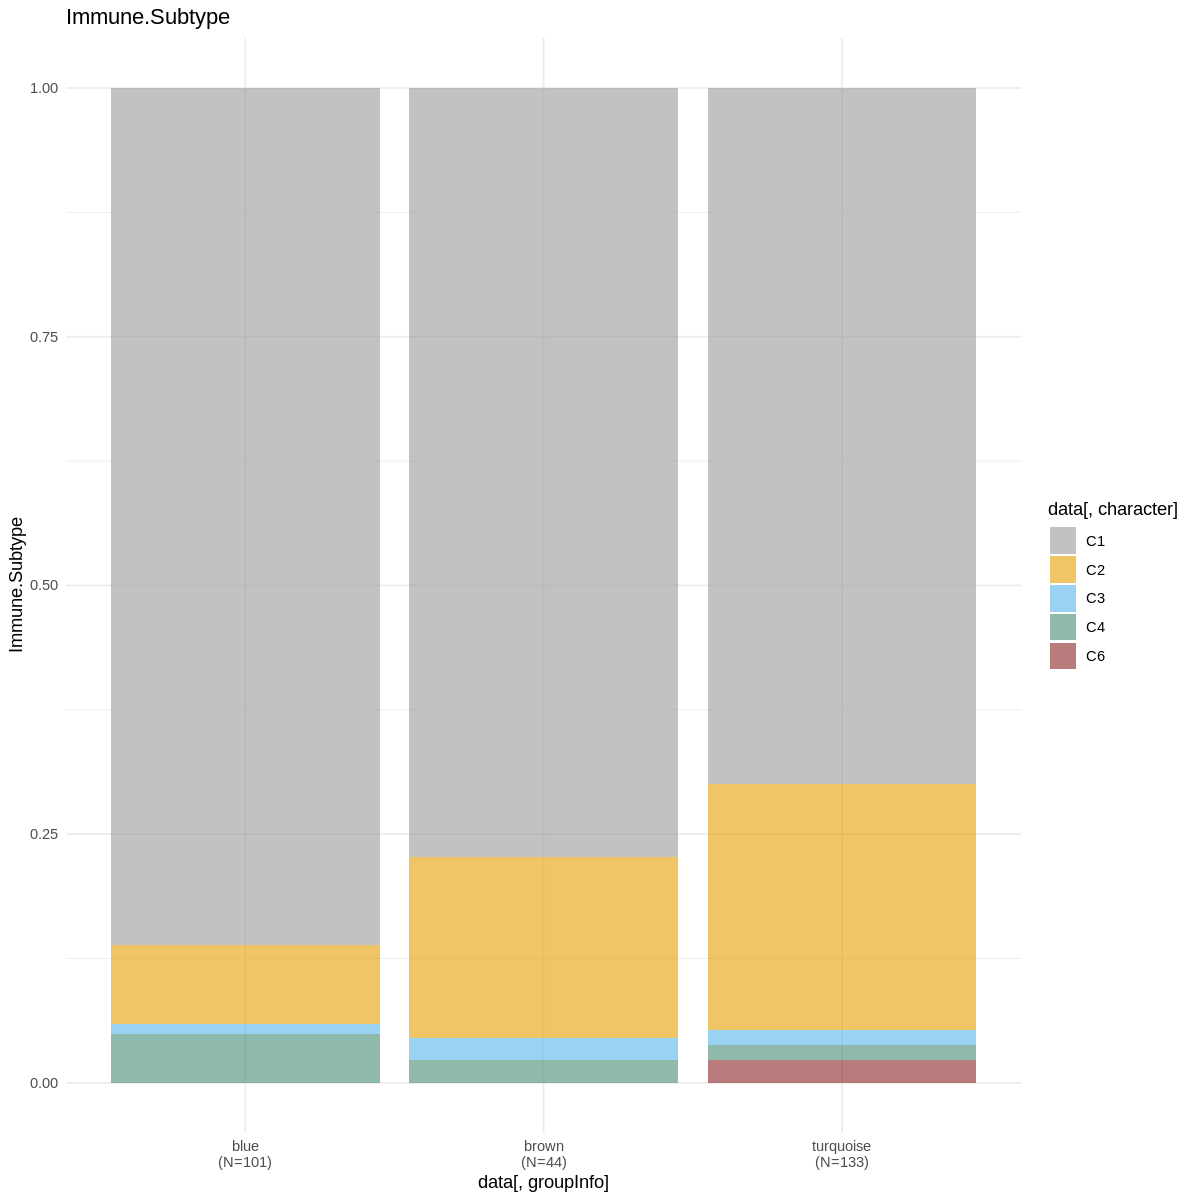

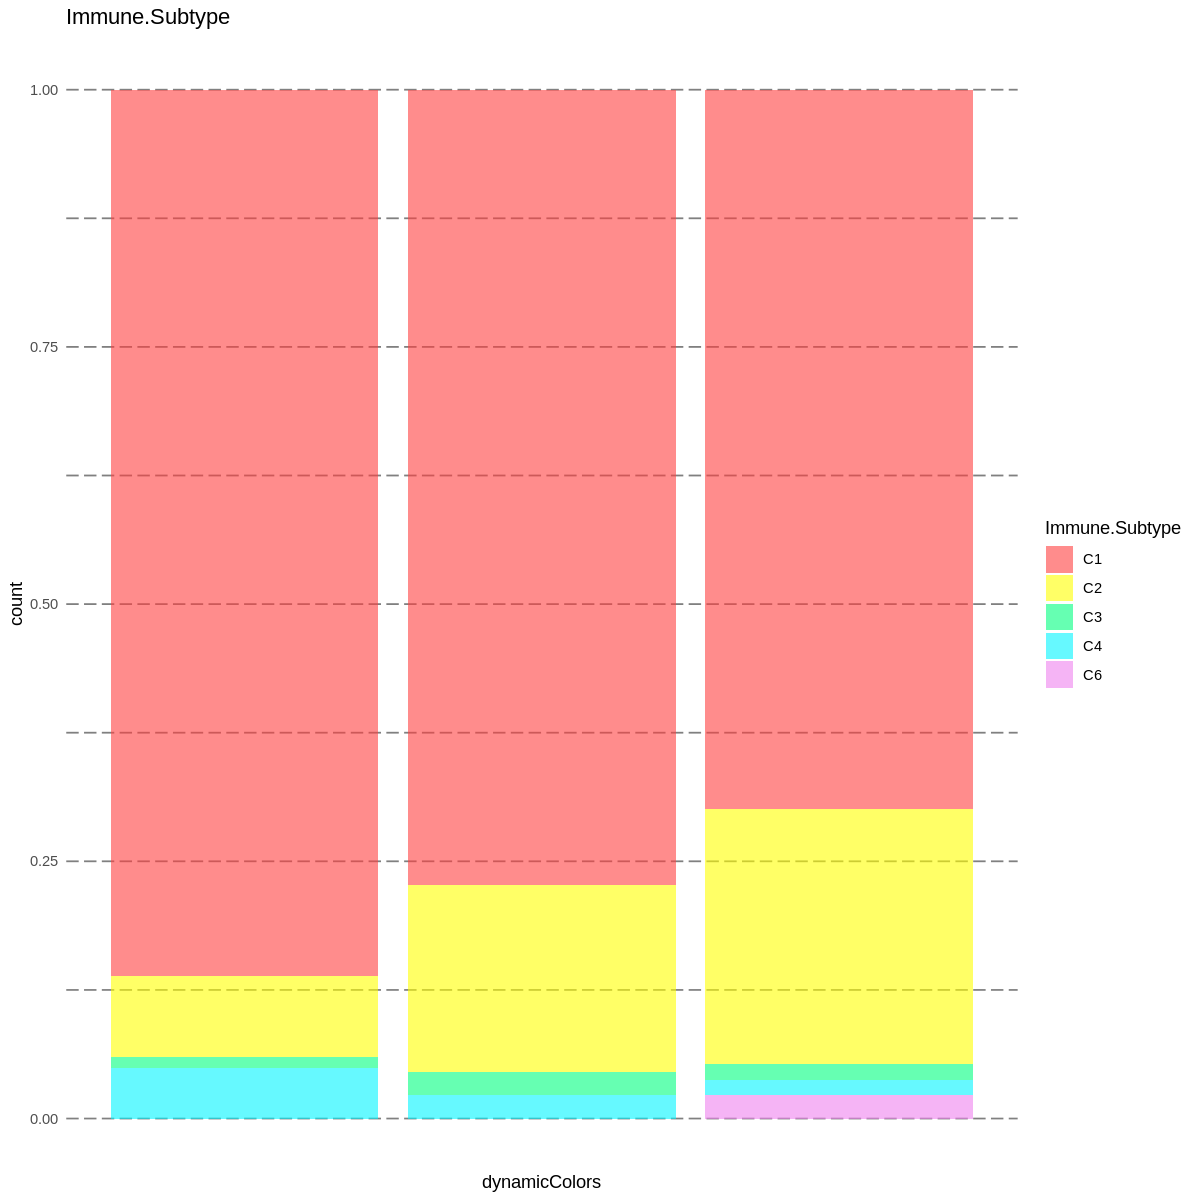

In [69]:
### 3)Construct ggplot dataframe
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/ggplot2_JH.R")
## Immune.Subtype ##
library(ggplot2)
ggplot2_barPlot_JH(df = MergeTable.Immune.Char,groupInfo = "dynamicColors",
                   character = "Immune.Subtype",
                   values= alpha(c("#999999", "#E69F00", "#56B4E9","#458B74","#8B2323"),0.6)
                   )
## Immune.Subtype ##
library(ggplot2)
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$Immune.Subtype))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors,fill=Immune.Subtype))+
  geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
  theme(panel.grid.minor = element_line(size = 0.5,colour = "#808080",linetype = "longdash"), 
        panel.grid.major = element_line(size = 0.5,colour = "#808080",linetype = "longdash"))+
  scale_x_discrete(breaks = NULL) + 
  scale_fill_manual(values= alpha(c("#FF4040", "#FFFF00", "#00FF7F","#00F5FF","#EE82EE"),0.6)) +
  labs(title ="Immune.Subtype")

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Leukocyte.Fraction,blue,brown,1.667577e-09,3.3e-09,1.7e-09,****,Wilcoxon
Leukocyte.Fraction,blue,turquoise,2.502053e-17,7.5e-17,< 2e-16,****,Wilcoxon
Leukocyte.Fraction,brown,turquoise,2.378309e-01,2.4e-01,0.24,ns,Wilcoxon


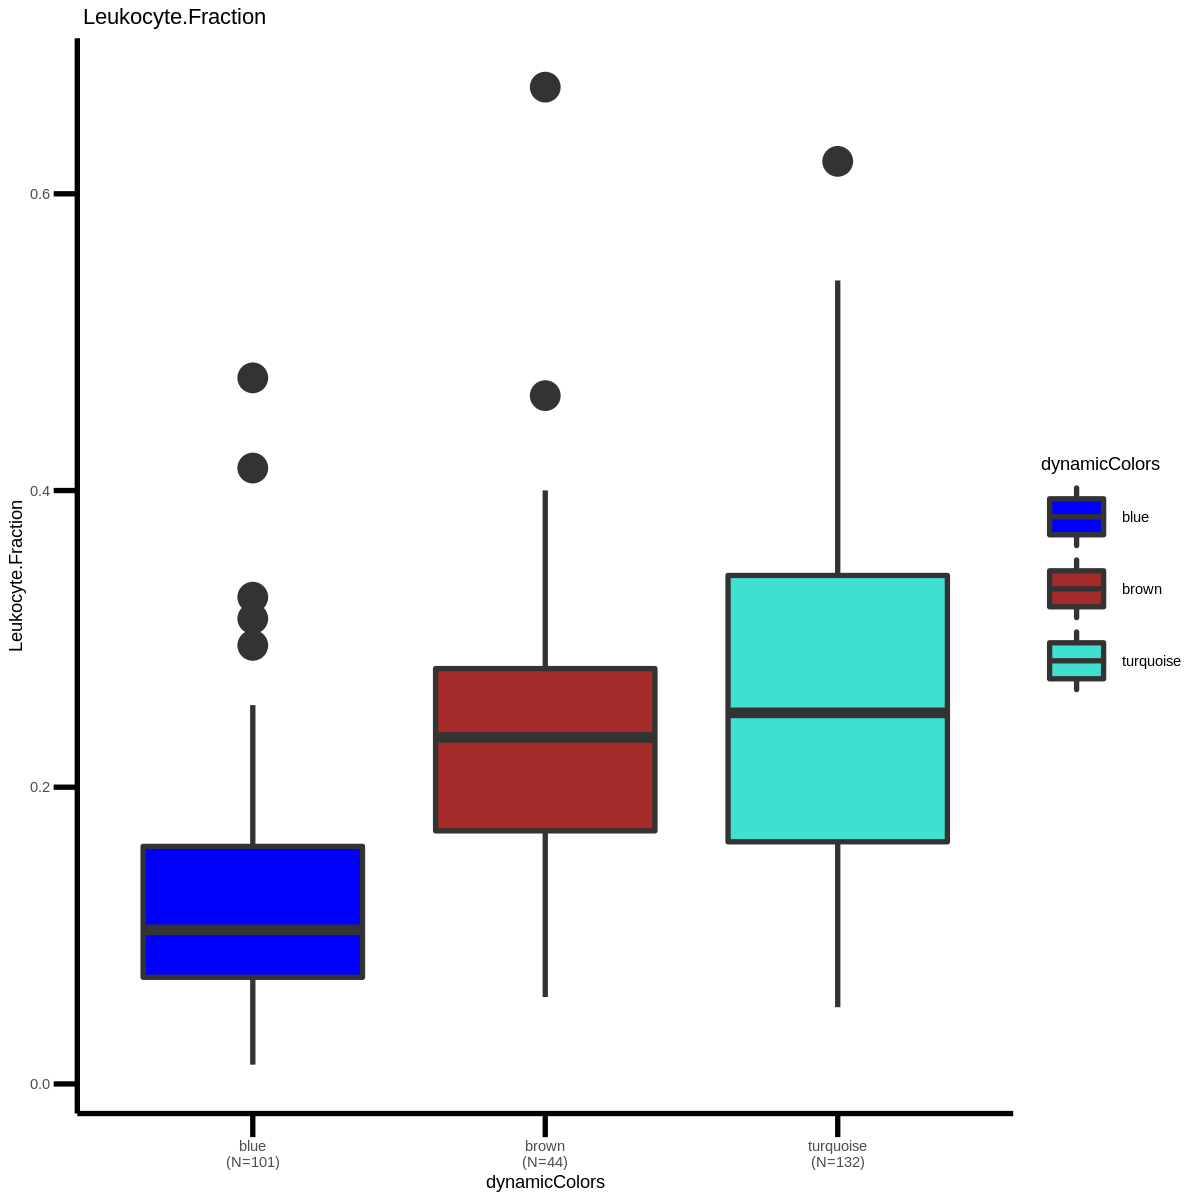

In [42]:
## Leukocyte.Fraction ##
# Remove NA value
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$Leukocyte.Fraction))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = Leukocyte.Fraction,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =" Leukocyte.Fraction") 
ggpubr::compare_means(Leukocyte.Fraction ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 19 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Stromal.Fraction,blue,brown,5.033513e-08,1.0e-07,5.0e-08,****,Wilcoxon
Stromal.Fraction,blue,turquoise,3.516671e-10,1.1e-09,3.5e-10,****,Wilcoxon
Stromal.Fraction,brown,turquoise,2.775384e-01,2.8e-01,0.28,ns,Wilcoxon


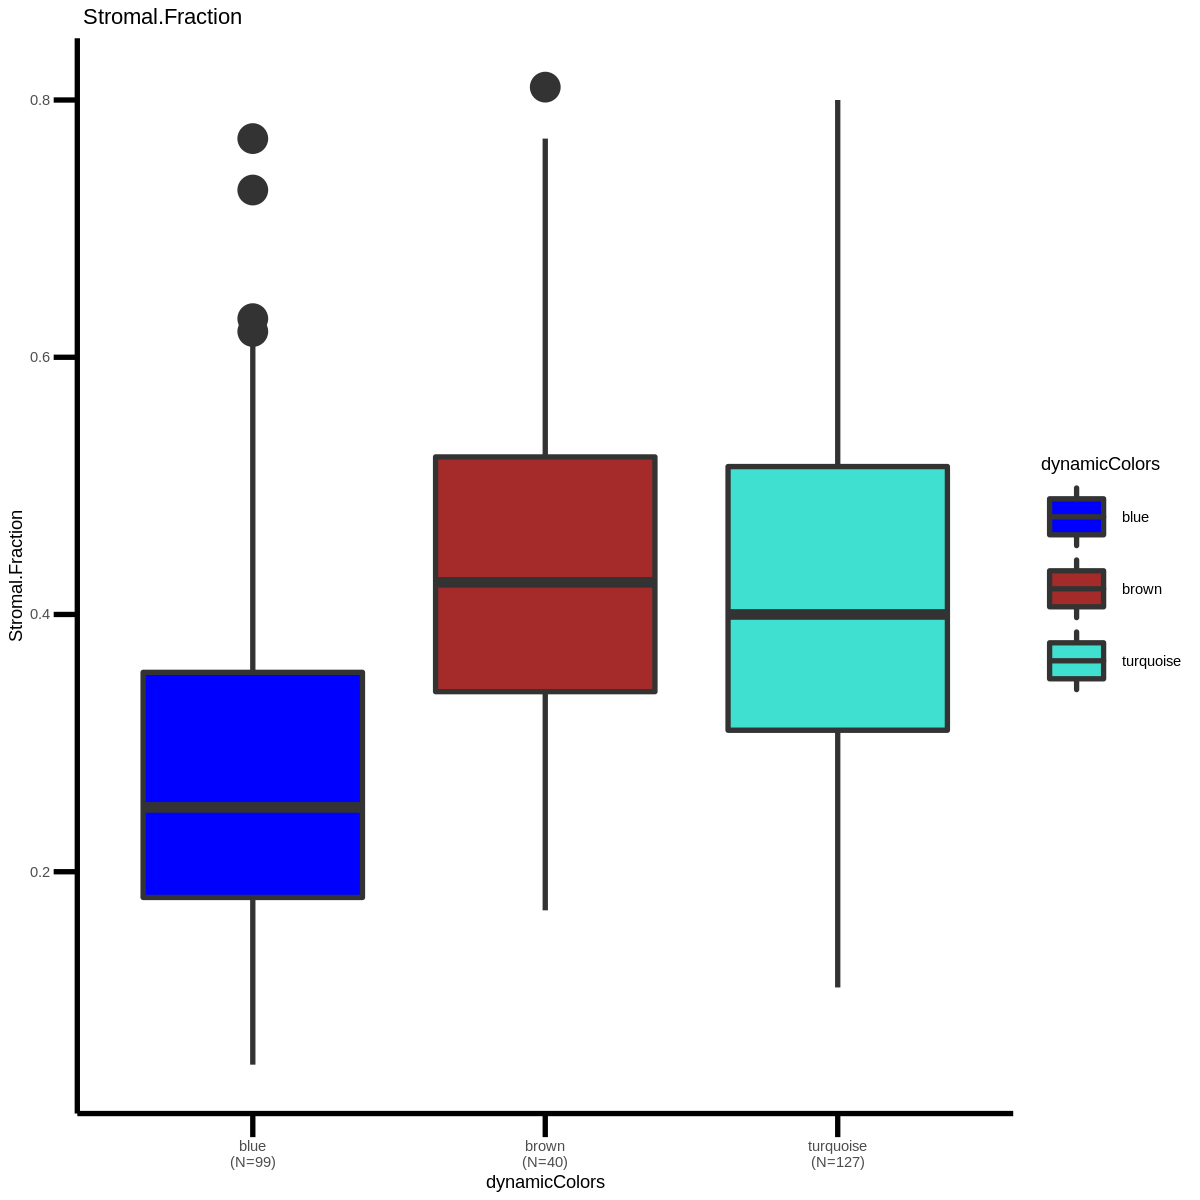

In [43]:
## Stromal.Fraction ##
# Remove NA value

data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$Stromal.Fraction))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = Stromal.Fraction,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =" Stromal.Fraction") 
ggpubr::compare_means(Stromal.Fraction ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 33 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
TIL.Regional.Fraction,blue,brown,0.002206805,0.0066,0.0022,**,Wilcoxon
TIL.Regional.Fraction,blue,turquoise,0.353046972,0.3500,0.3530,ns,Wilcoxon
TIL.Regional.Fraction,brown,turquoise,0.033135586,0.0660,0.0331,*,Wilcoxon


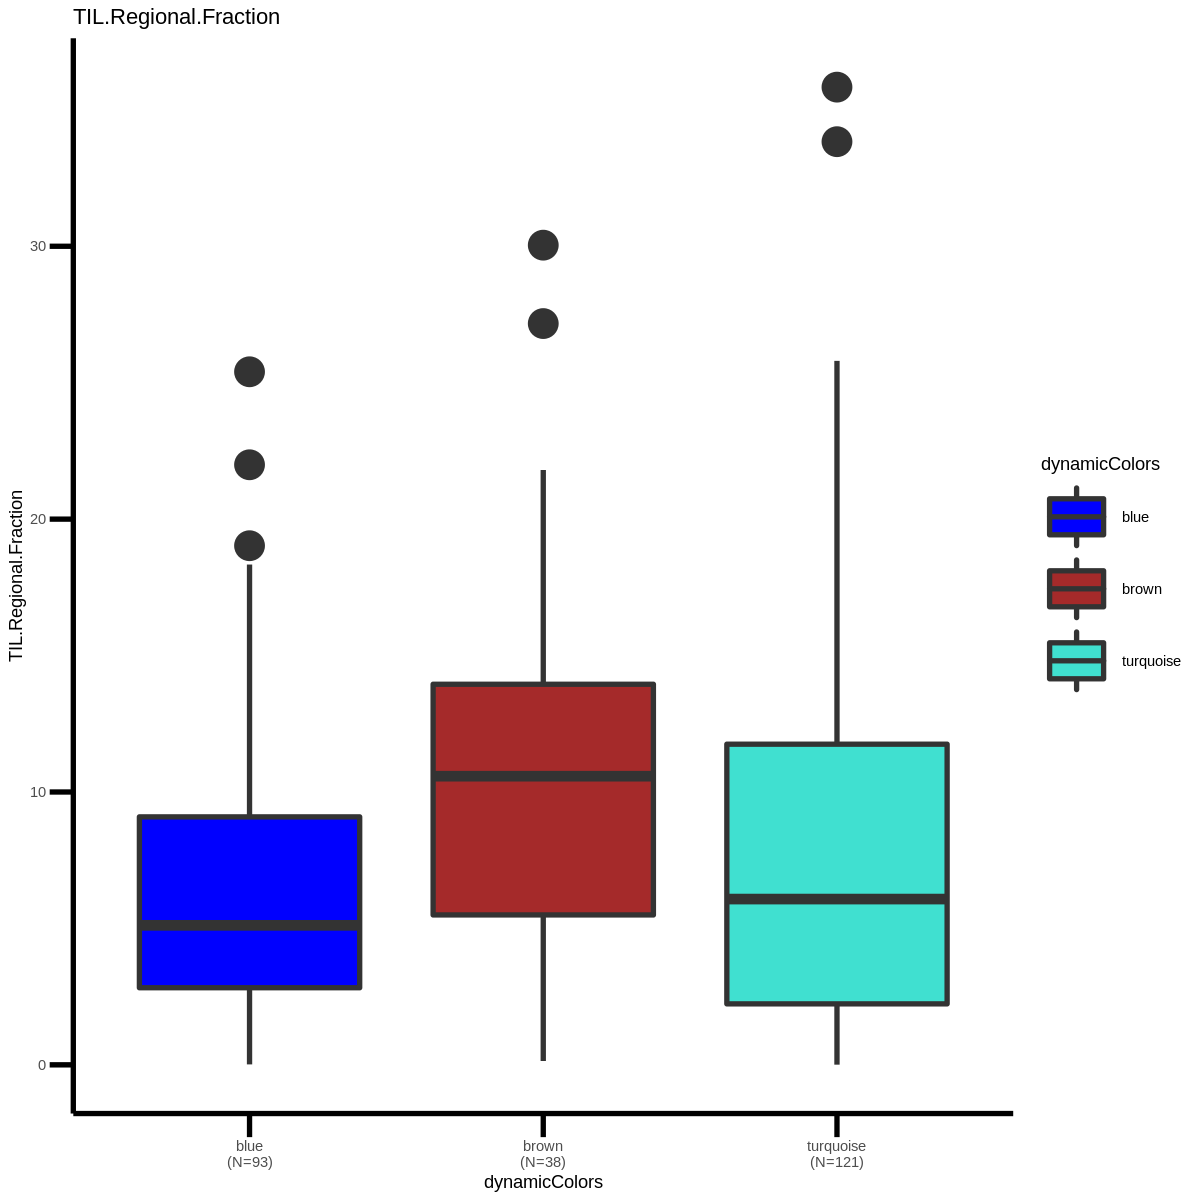

In [44]:
## TIL.Regional.Fraction ## 

data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$TIL.Regional.Fraction))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = TIL.Regional.Fraction,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="TIL.Regional.Fraction") 
ggpubr::compare_means(TIL.Regional.Fraction ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

#### The Immune Landscape of Cancer 5 Representative Gene Signature Identification

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Wound.Healing,blue,brown,0.4739577,0.95,0.47,ns,Wilcoxon
Wound.Healing,blue,turquoise,0.2488037,0.75,0.25,ns,Wilcoxon
Wound.Healing,brown,turquoise,0.8866421,0.95,0.89,ns,Wilcoxon


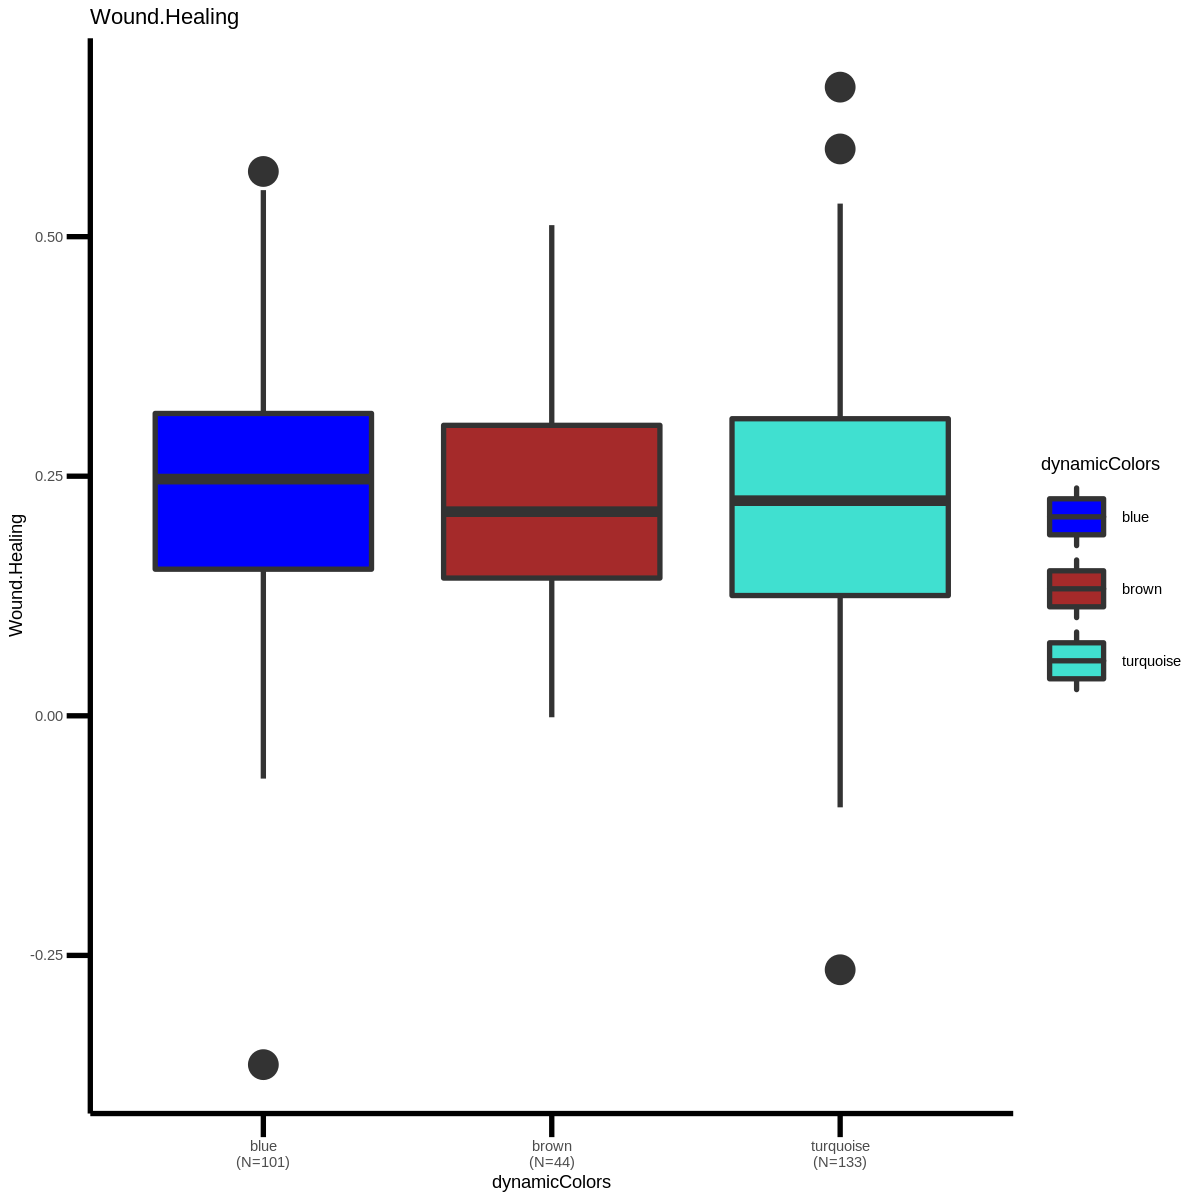

In [46]:
## Wound.Healing ##

data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$Wound.Healing))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = Wound.Healing,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="Wound.Healing") 
ggpubr::compare_means(Wound.Healing ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Macrophage.Regulation,blue,brown,1.694888e-17,3.4e-17,<2e-16,****,Wilcoxon
Macrophage.Regulation,blue,turquoise,1.893688e-34,5.7e-34,<2e-16,****,Wilcoxon
Macrophage.Regulation,brown,turquoise,1.168395e-03,1.2e-03,0.0012,**,Wilcoxon


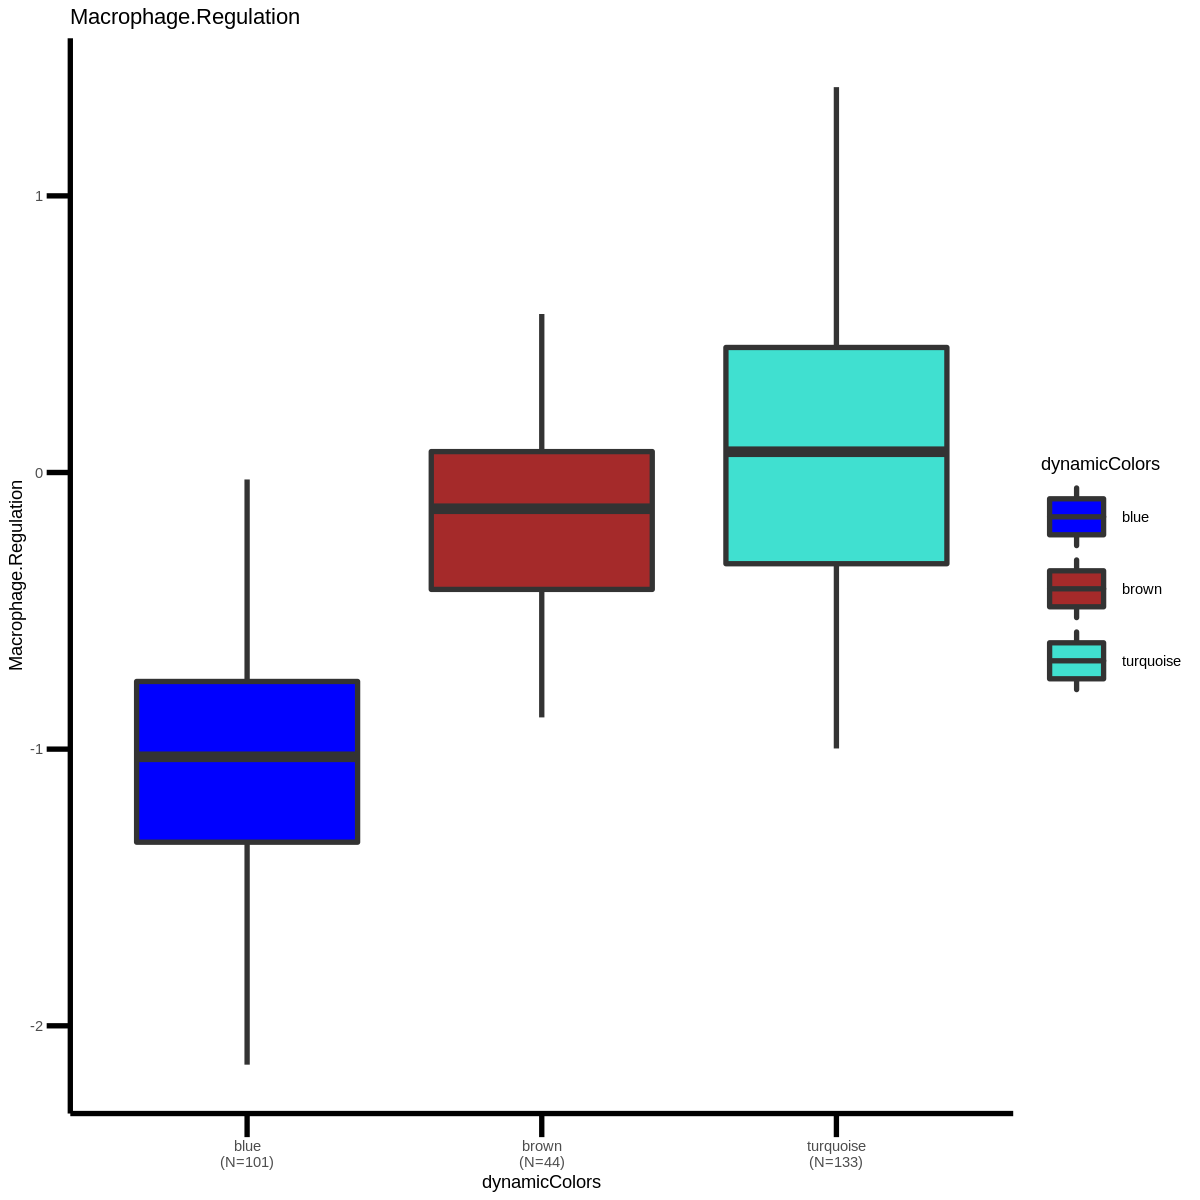

In [48]:
## Macrophage.Regulation ##
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$Macrophage.Regulation))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = Macrophage.Regulation,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="Macrophage.Regulation") 
ggpubr::compare_means(Macrophage.Regulation ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Lymphocyte.Infiltration.Signature.Score,blue,brown,9.338484e-18,1.9e-17,<2e-16,****,Wilcoxon
Lymphocyte.Infiltration.Signature.Score,blue,turquoise,5.871707e-23,1.8e-22,<2e-16,****,Wilcoxon
Lymphocyte.Infiltration.Signature.Score,brown,turquoise,1.303506e-02,1.3e-02,0.013,*,Wilcoxon


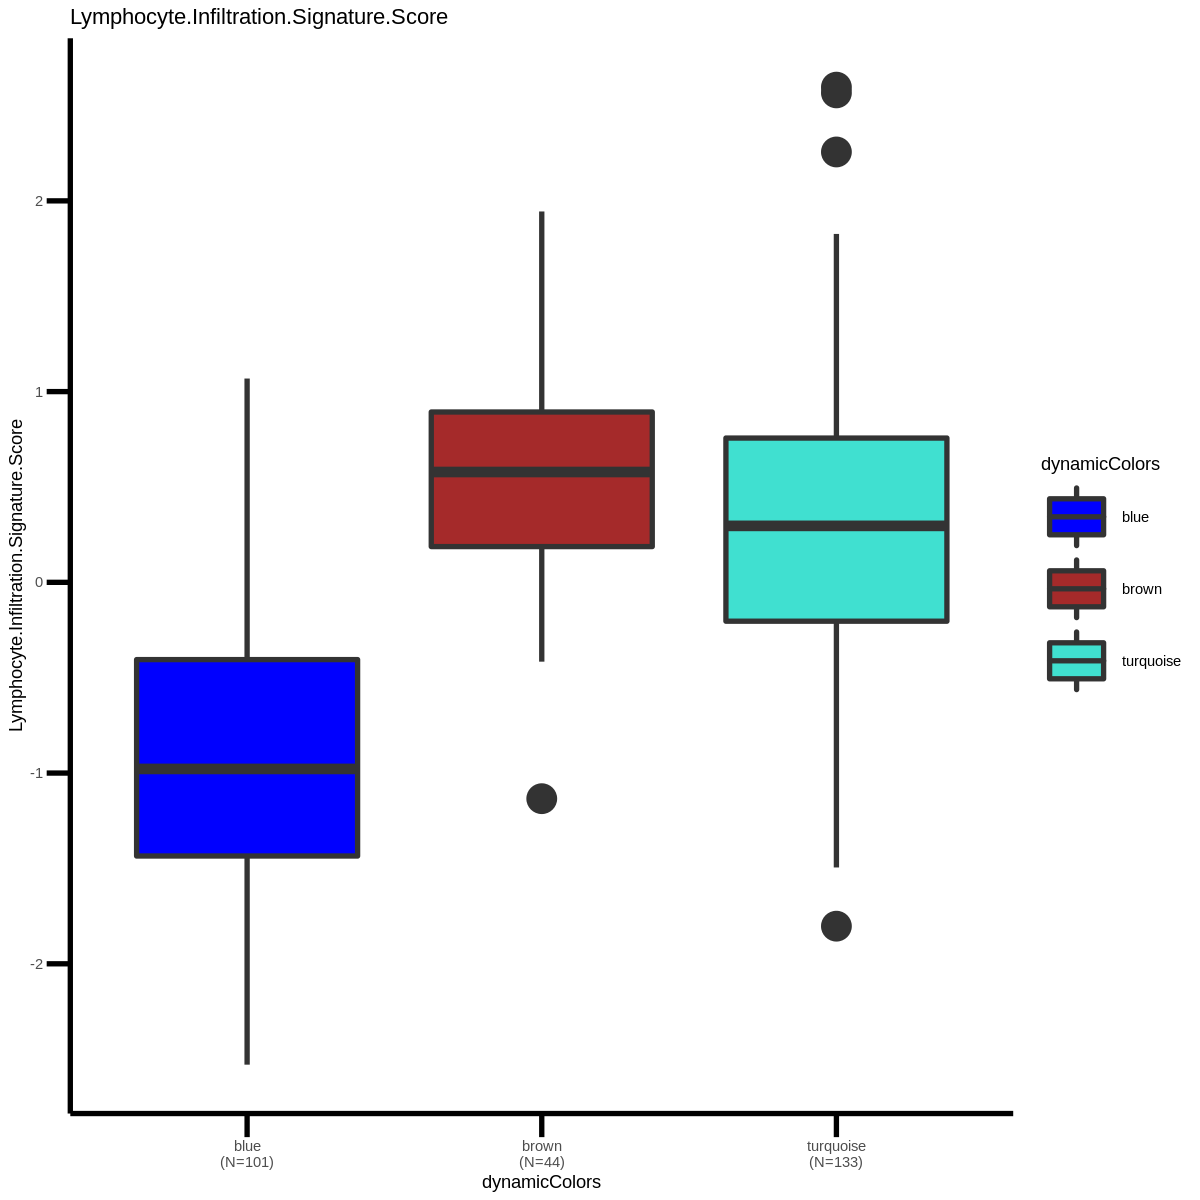

In [49]:
## Lymphocyte.Infiltration.Signature.Score ##
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$Lymphocyte.Infiltration.Signature.Score))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = Lymphocyte.Infiltration.Signature.Score,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="Lymphocyte.Infiltration.Signature.Score") 
ggpubr::compare_means(Lymphocyte.Infiltration.Signature.Score ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
IFN.gamma.Response,blue,brown,2.034246e-06,4.1e-06,2.0e-06,****,Wilcoxon
IFN.gamma.Response,blue,turquoise,1.947386e-13,5.8e-13,1.9e-13,****,Wilcoxon
IFN.gamma.Response,brown,turquoise,7.959032e-02,8.0e-02,0.08,ns,Wilcoxon


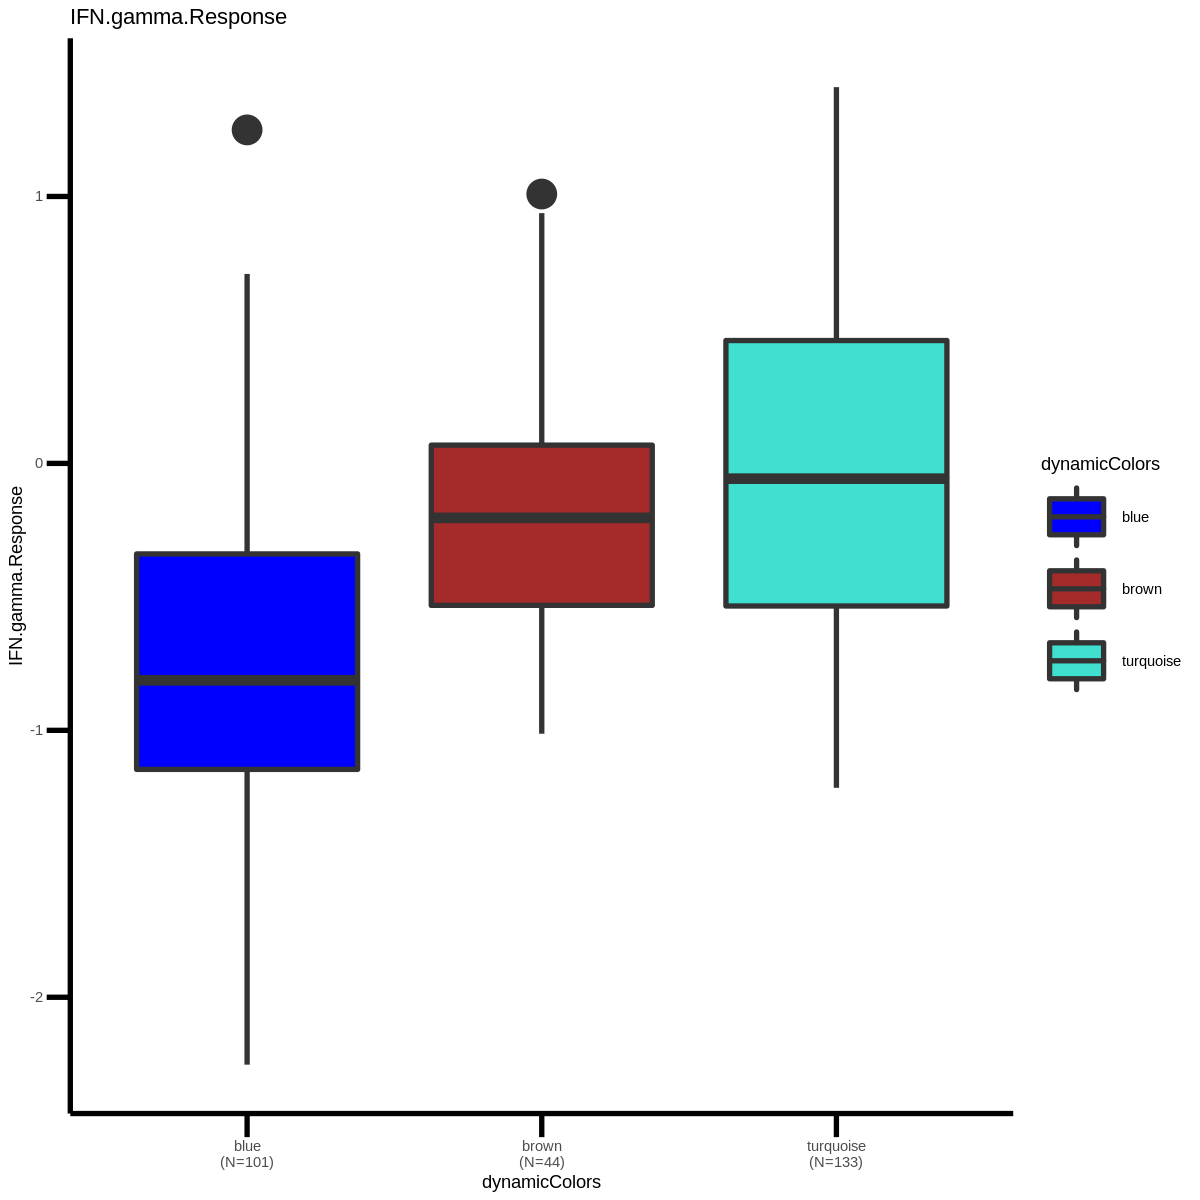

In [50]:
## IFN.gamma.Response ##

data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$IFN.gamma.Response))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = IFN.gamma.Response,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="IFN.gamma.Response") 
ggpubr::compare_means(IFN.gamma.Response ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
TGF.beta.Response,blue,brown,4.438115e-05,8.8e-05,4.4e-05,****,Wilcoxon
TGF.beta.Response,blue,turquoise,3.518762e-22,1.1e-21,< 2e-16,****,Wilcoxon
TGF.beta.Response,brown,turquoise,4.378558e-05,8.8e-05,4.4e-05,****,Wilcoxon


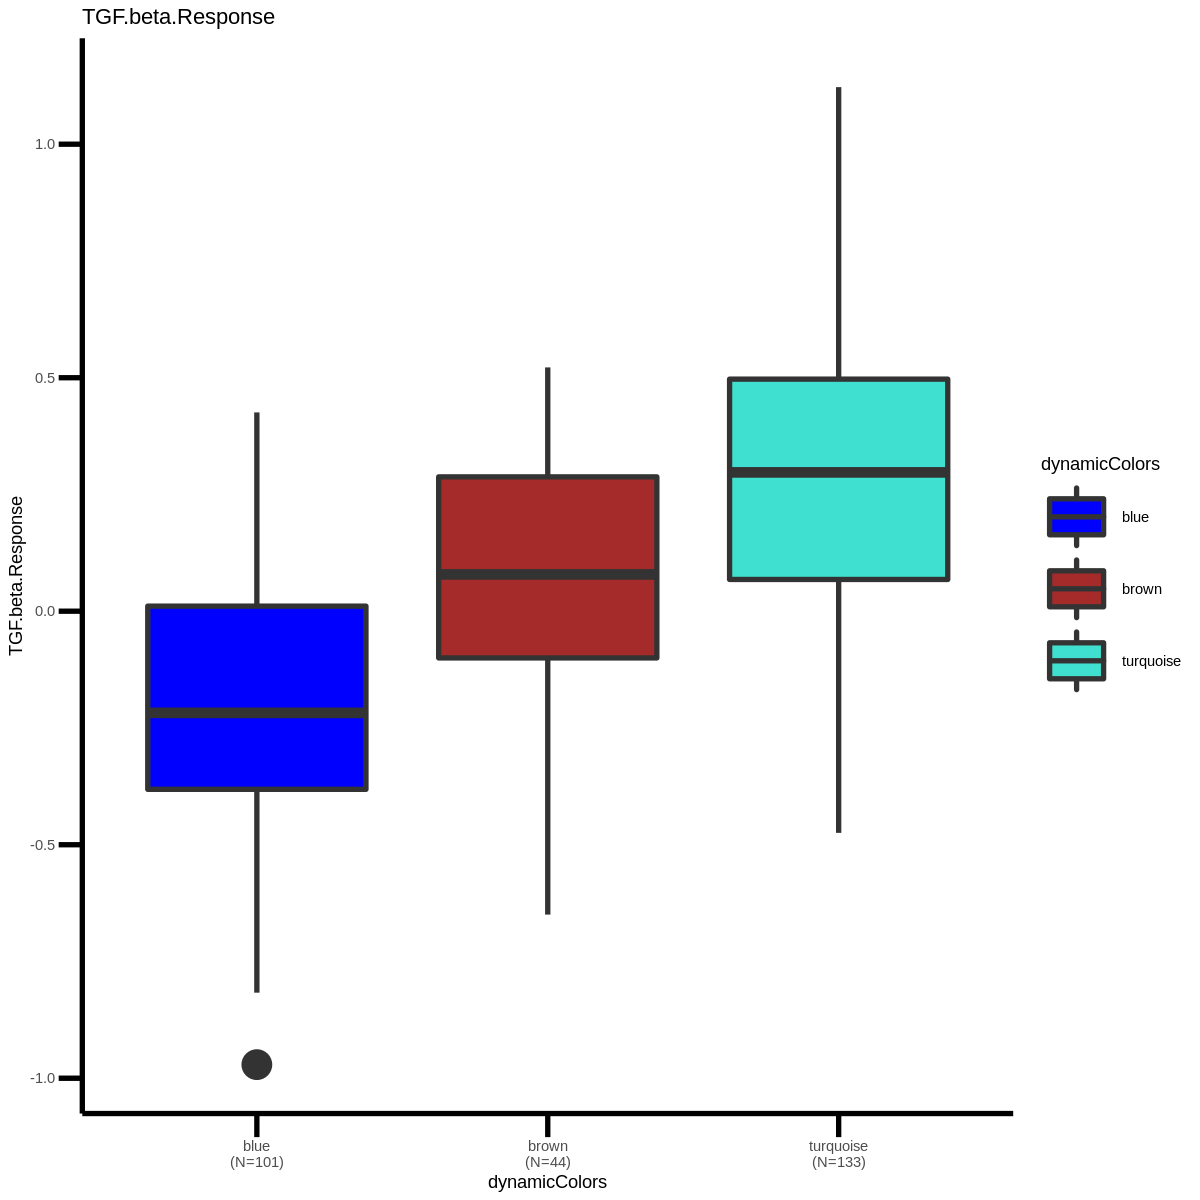

In [51]:
## TGF.beta.Response ##
#MergeTable.Immune.Char$TGF.beta.Response

data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$TGF.beta.Response))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = TGF.beta.Response,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="TGF.beta.Response") 
ggpubr::compare_means(TGF.beta.Response ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

#### T- and B- Cell Receptor Analysis 

Warning message:
“Removed 108 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
BCR.Evenness,blue,brown,0.078473124,0.160,0.078,ns,Wilcoxon
BCR.Evenness,blue,turquoise,0.007993166,0.024,0.008,**,Wilcoxon
BCR.Evenness,brown,turquoise,0.636240473,0.640,0.636,ns,Wilcoxon


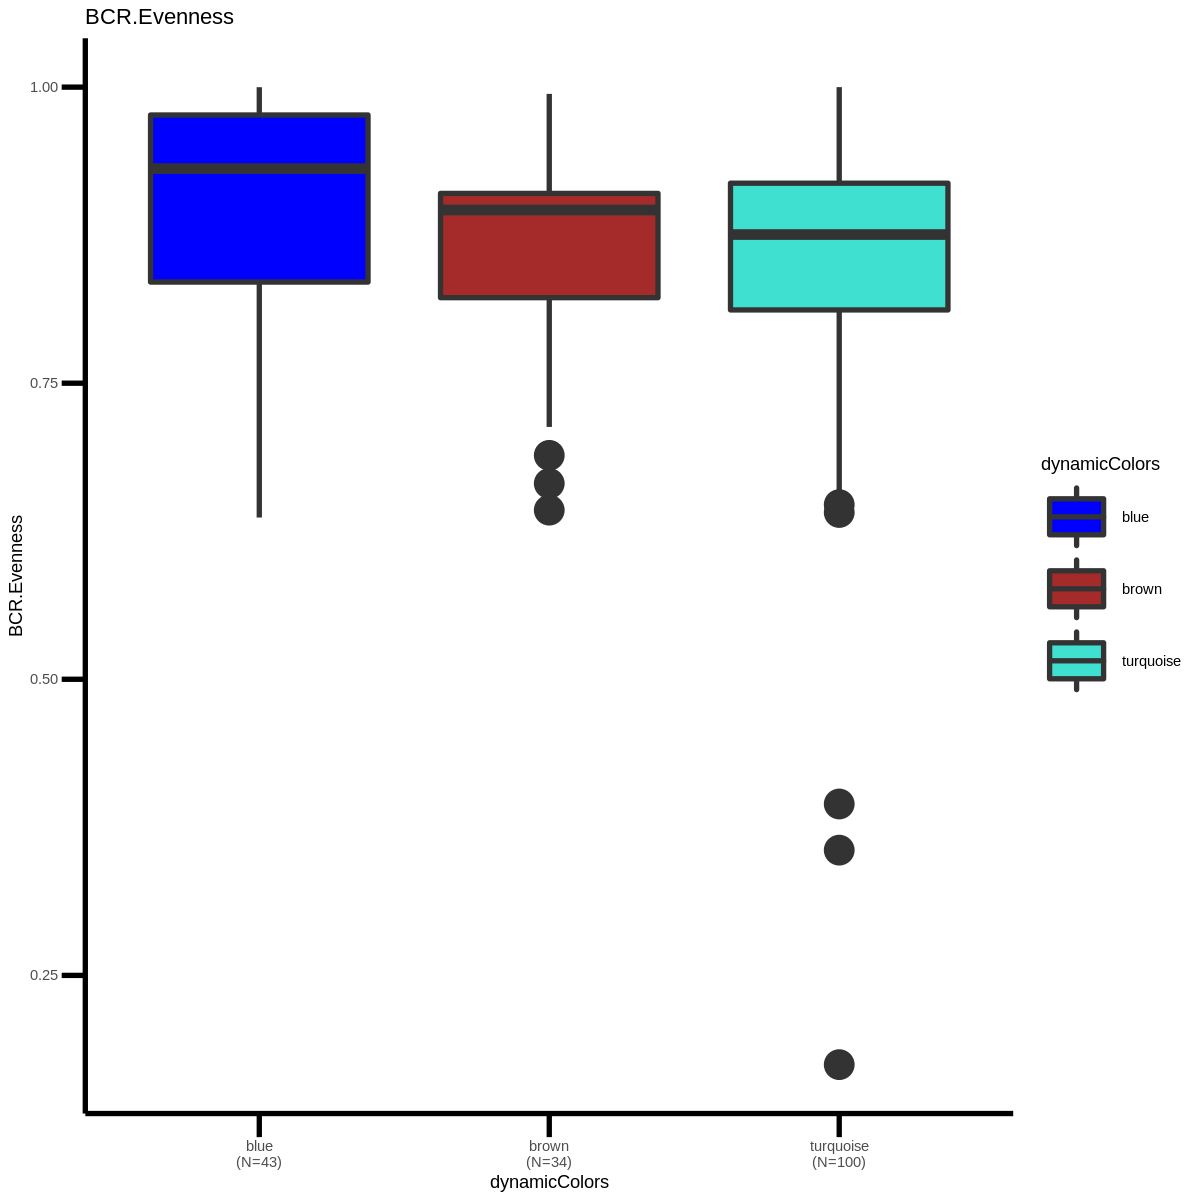

In [53]:
#### T- and B- Cell Receptor Analysis ####
#IgH diversity scores (Shannon Entropy, Evenness, and Richness)
## BCR.Evenness ##
#MergeTable.Immune.Char$BCR.Richness
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$BCR.Evenness))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = BCR.Evenness,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="BCR.Evenness") 
ggpubr::compare_means(BCR.Evenness ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 86 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
BCR.Shannon,blue,brown,8.226385e-06,2.5e-05,8.2e-06,****,Wilcoxon
BCR.Shannon,blue,turquoise,5.940311e-05,1.2e-04,5.9e-05,****,Wilcoxon
BCR.Shannon,brown,turquoise,2.844297e-01,2.8e-01,0.28,ns,Wilcoxon


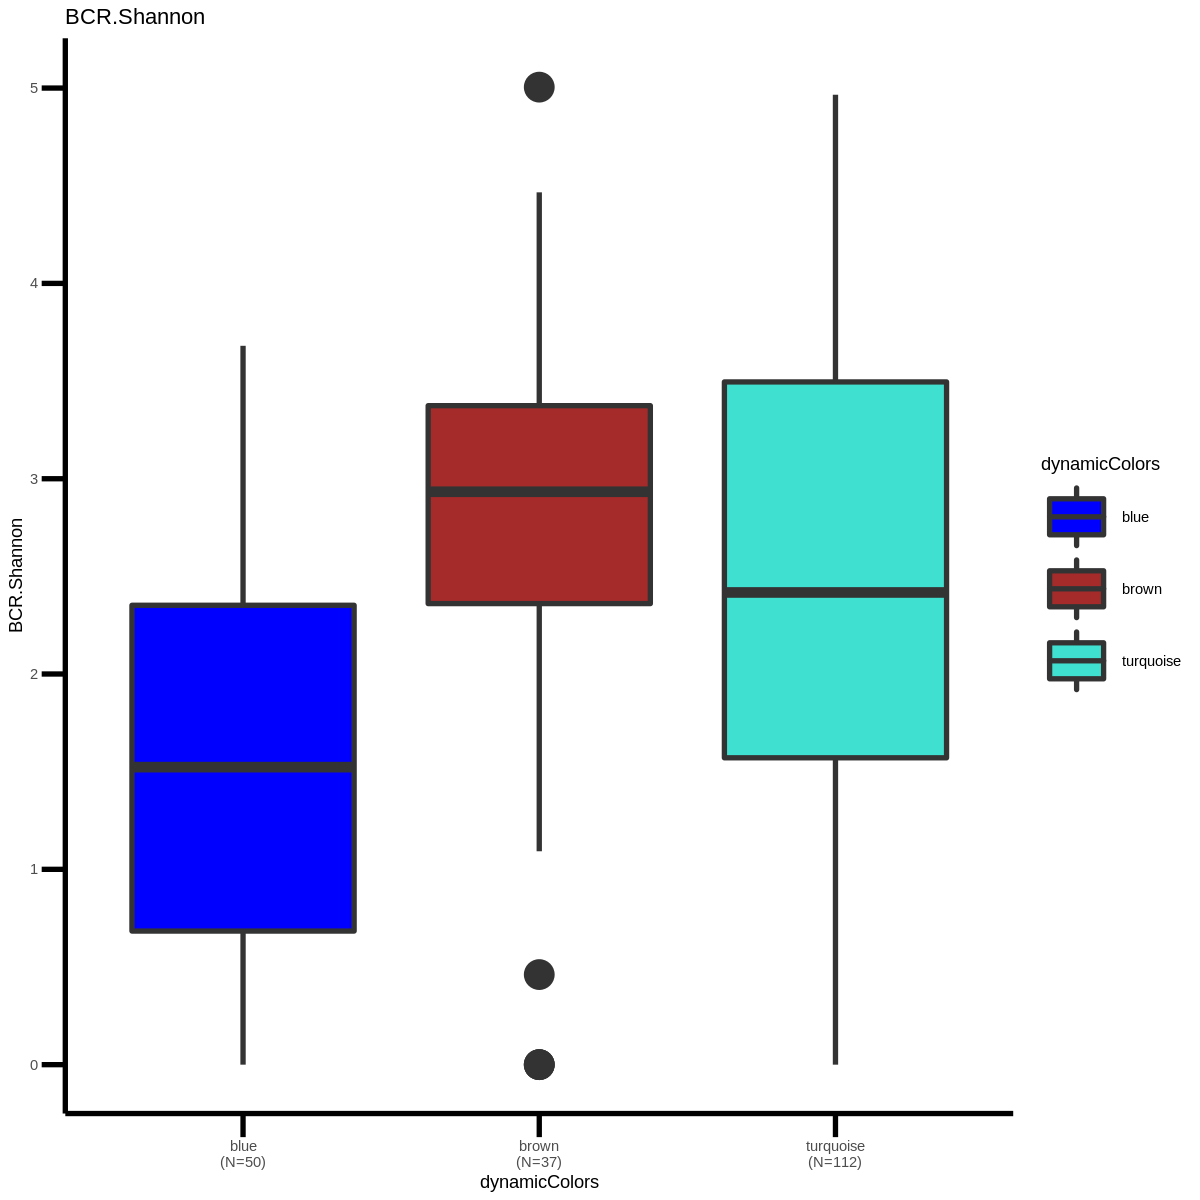

In [55]:
## BCR.Shannon ##
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$BCR.Shannon))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = BCR.Shannon,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="BCR.Shannon") 
ggpubr::compare_means(BCR.Shannon ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 86 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
BCR.Richness,blue,brown,1.163325e-05,3.5e-05,1.2e-05,****,Wilcoxon
BCR.Richness,blue,turquoise,2.351400e-05,4.7e-05,2.4e-05,****,Wilcoxon
BCR.Richness,brown,turquoise,3.035084e-01,3.0e-01,0.3,ns,Wilcoxon


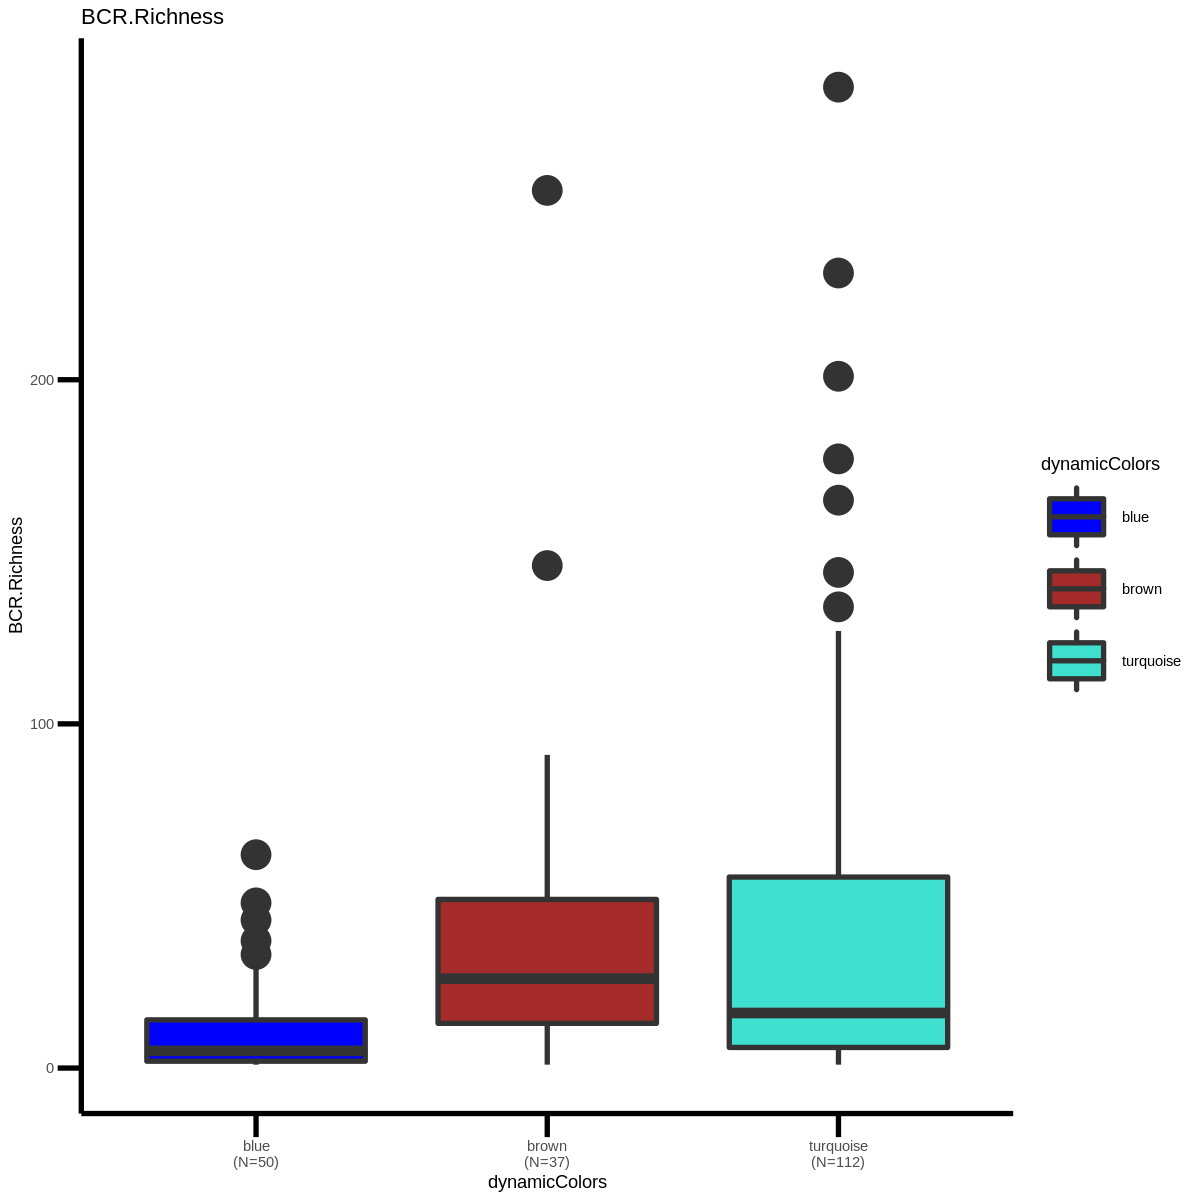

In [57]:
## BCR.Richness ##
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$BCR.Richness))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = BCR.Richness,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="BCR.Richness") 
ggpubr::compare_means(BCR.Richness ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 30 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
TCR.Shannon,blue,brown,4.620697e-11,9.2e-11,4.6e-11,****,Wilcoxon
TCR.Shannon,blue,turquoise,1.259204e-16,3.8e-16,< 2e-16,****,Wilcoxon
TCR.Shannon,brown,turquoise,5.174572e-01,5.2e-01,0.52,ns,Wilcoxon


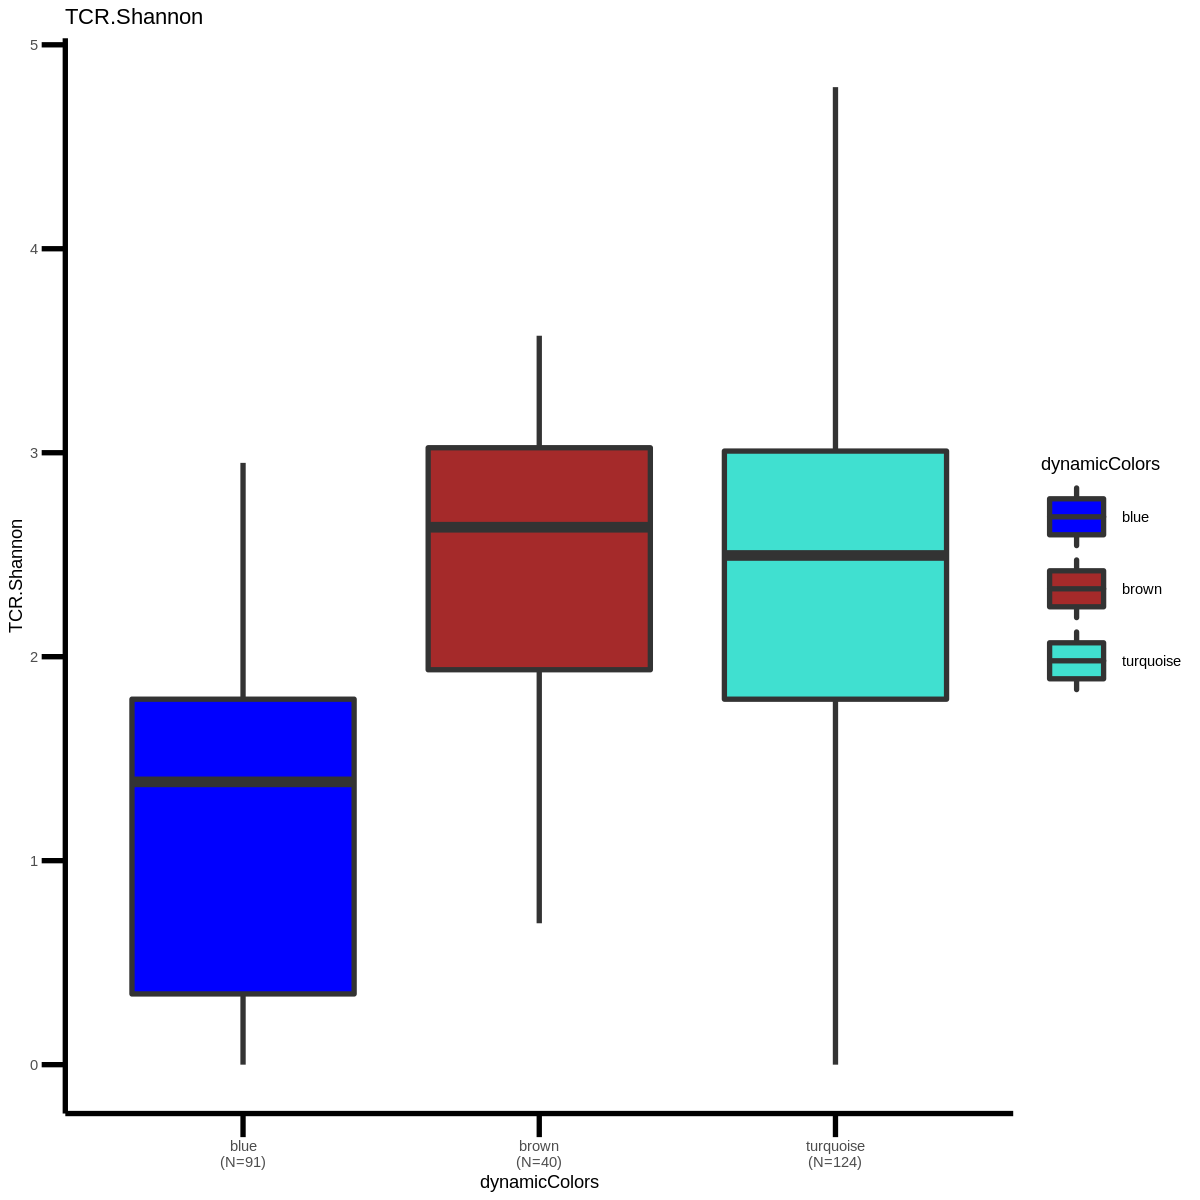

In [58]:
##  TCR diversity scores (Shannon Entropy, Evenness, and Richness) 
#MergeTable.Immune.Char$TCR.Evenness
## TCR.Shannon ##
data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$TCR.Shannon))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = TCR.Shannon,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="TCR.Shannon") 
ggpubr::compare_means(TCR.Shannon ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
TCR.Richness,blue,brown,9.081593e-12,1.8e-11,9.1e-12,****,Wilcoxon
TCR.Richness,blue,turquoise,3.138662e-18,9.4e-18,< 2e-16,****,Wilcoxon
TCR.Richness,brown,turquoise,5.502270e-01,5.5e-01,0.55,ns,Wilcoxon


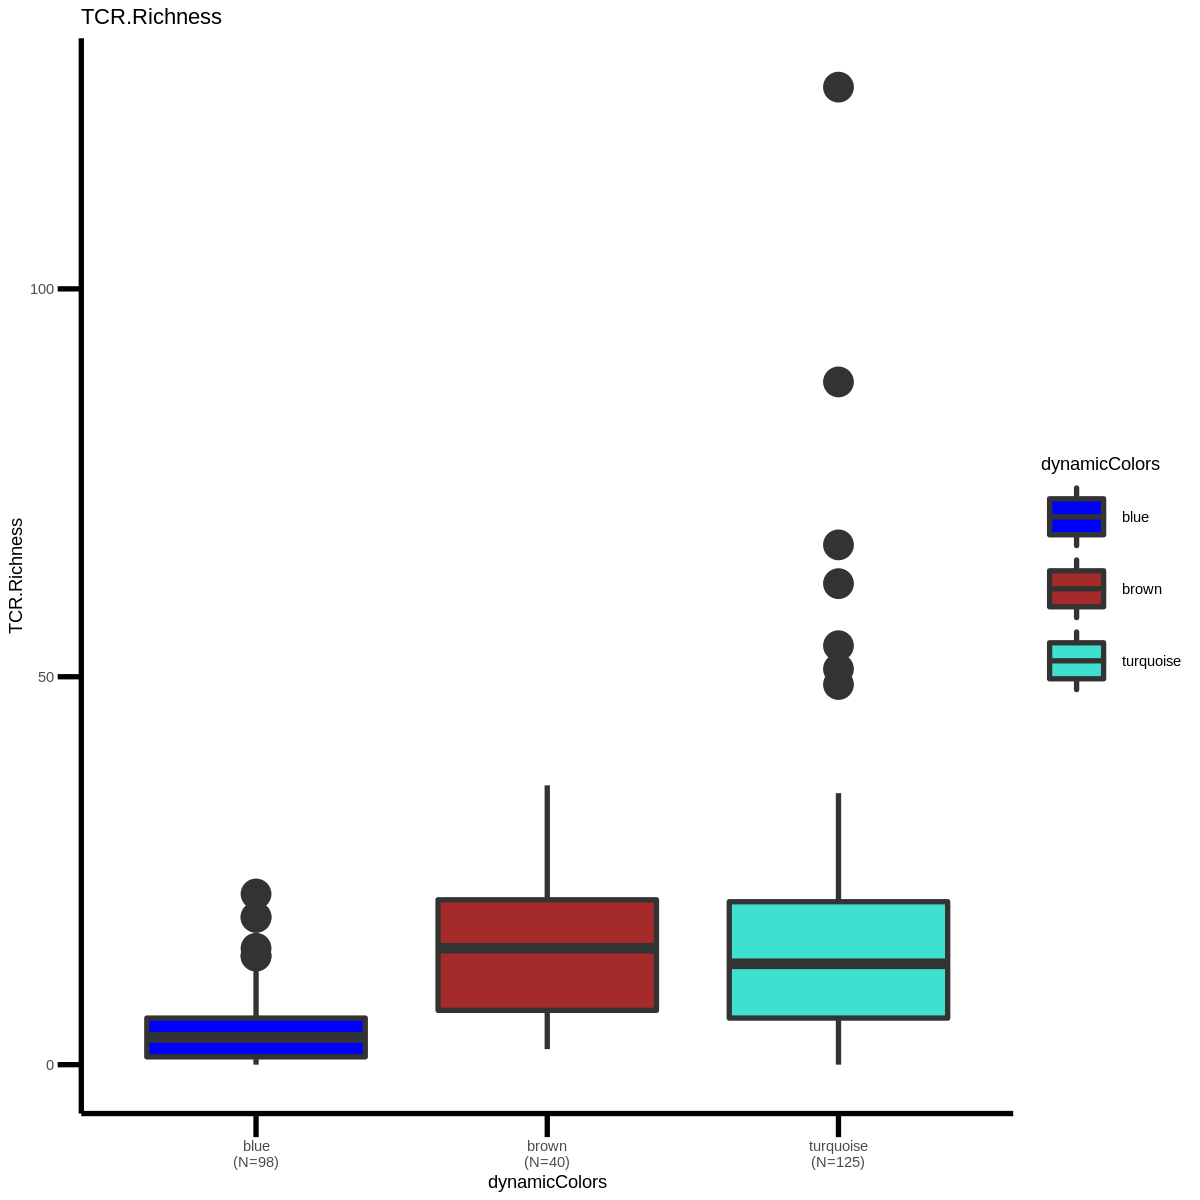

In [59]:

data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$TCR.Richness))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = TCR.Richness,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="TCR.Richness") 
ggpubr::compare_means(TCR.Richness ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")

Warning message:
“Removed 56 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
TCR.Evenness,blue,brown,0.0047003582,0.00940,0.0047,**,Wilcoxon
TCR.Evenness,blue,turquoise,0.0002030394,0.00061,0.0002,***,Wilcoxon
TCR.Evenness,brown,turquoise,0.4250798120,0.43000,0.4251,ns,Wilcoxon


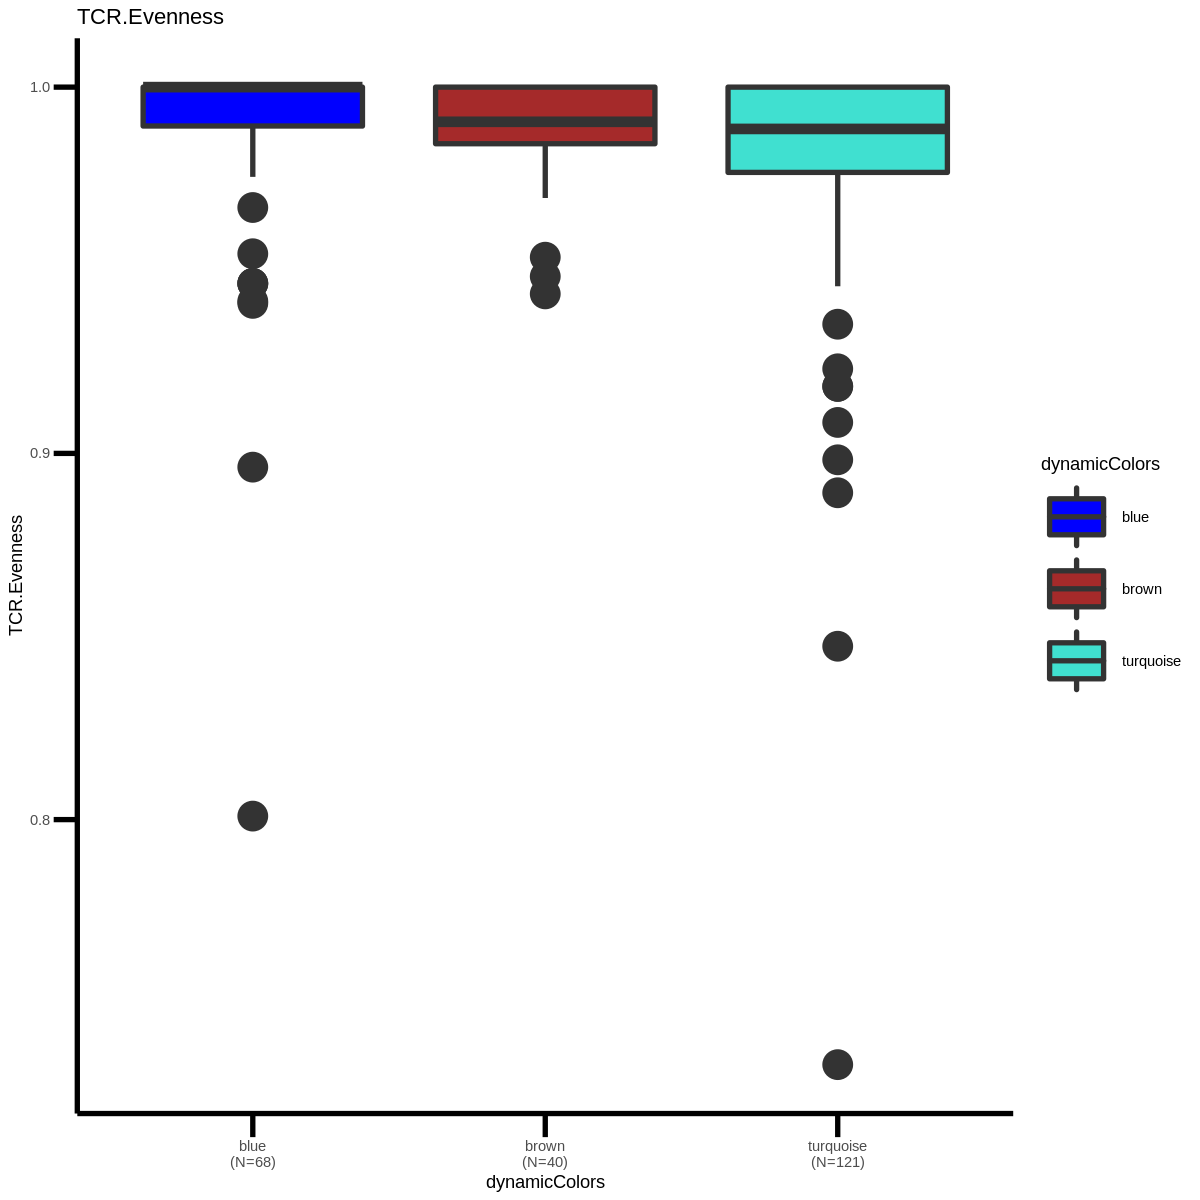

In [61]:

data=subset(MergeTable.Immune.Char, !is.na(MergeTable.Immune.Char$TCR.Evenness))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Char,aes(x = dynamicColors, y = TCR.Evenness,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="TCR.Evenness") 
ggpubr::compare_means(TCR.Evenness ~ dynamicColors,  data = MergeTable.Immune.Char,
                     method = "wilcox.test")


     blue     brown turquoise    yellow 
      103        47       135         0 

Warning message:
“Removed 116 rows containing non-finite values (stat_boxplot).”

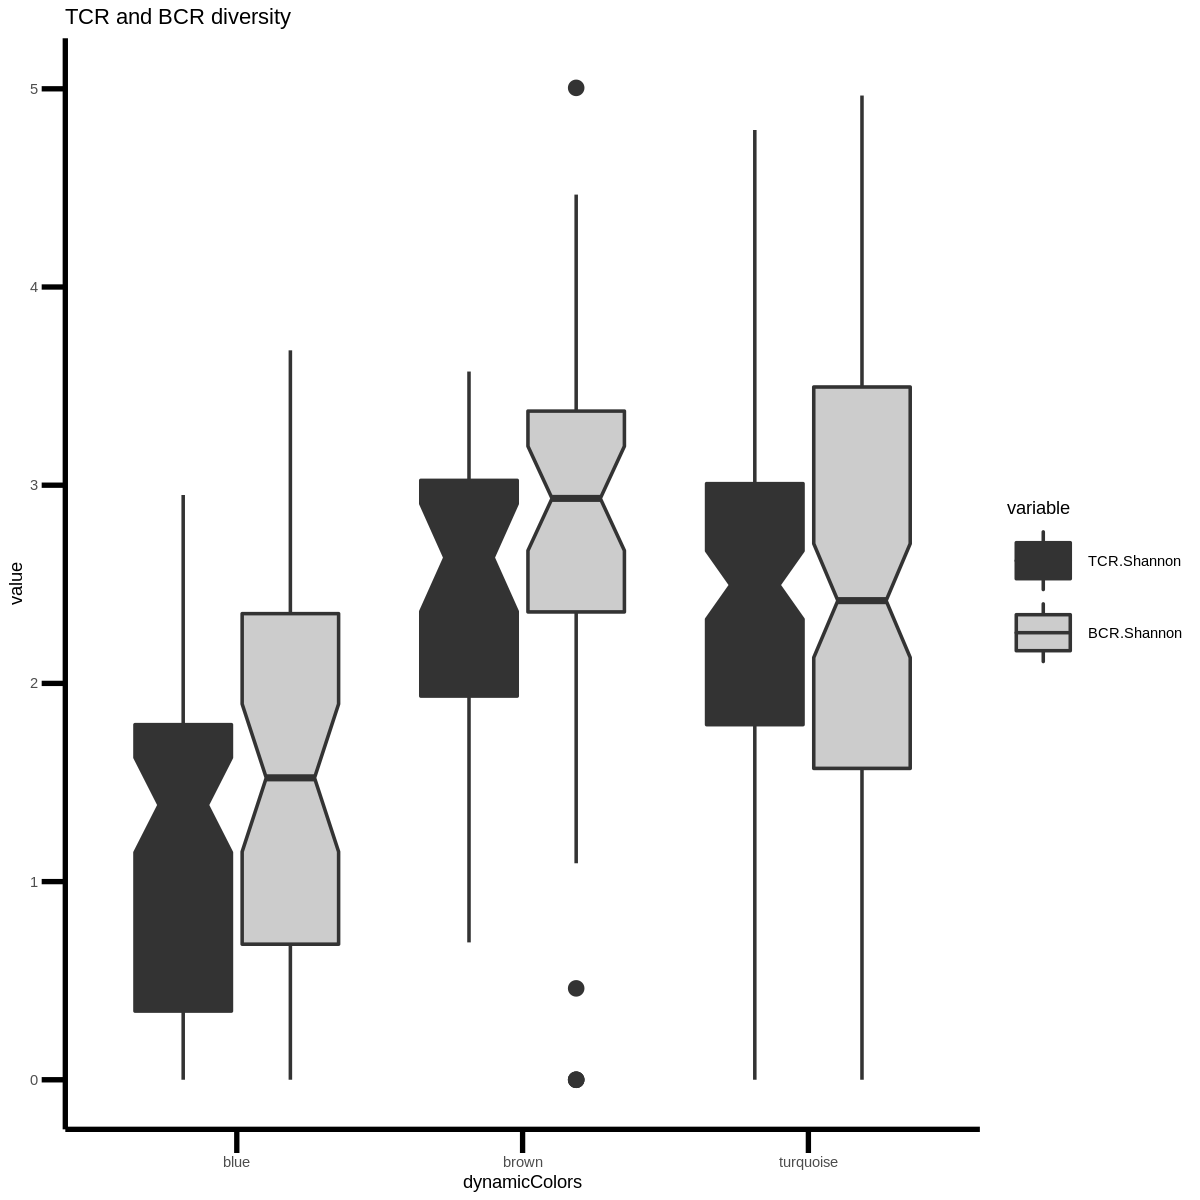

In [82]:
#### BCR and TCR Shannon summary
MergeTable.Immune.Shannon <- MergeTable.Immune.Char[,c("dynamicColors","TCR.Shannon","BCR.Shannon")]
table(MergeTable.Immune.Shannon$dynamicColors)
library(reshape2)
MergeTable.Immune.Shannon.m <- melt(MergeTable.Immune.Shannon,id.vars='dynamicColors')
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Shannon.m, aes(x=dynamicColors, y=value, fill=variable)) +
  geom_boxplot(lwd = 1,notch=T,outlier.size = 4) +
   scale_fill_grey()+
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
        axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  labs(title = "TCR and BCR diversity")


In [65]:
#### PD-1 PDL1 expression #####
# This gene encodes an immune inhibitory receptor ligand
# PDL1 : CD274
# PDL2: PDCD1LG2
## 1)load expression data from Omic datasets
RNAexp_voom_log2 <- readRDS("/data8t_4/JH/MyJobs/COAD_NormalCancer_Project/1_Omic_dataset/2020_3_14_Omic_COAD_RNAexp_voom_log2.rds")
## 2)Merge table
PDL_expr <- as.data.frame(t(RNAexp_voom_log2[c("CD274","PDCD1LG2"),]))
PDL_expr$rownames <- rownames(PDL_expr)
MergeTable.Immune.Gene <- dplyr::left_join(Cluster.df, PDL_expr, by = "rownames")
### Remove yellow
MergeTable.Immune.Gene <- MergeTable.Immune.Gene[MergeTable.Immune.Gene$dynamicColors != "yellow",]


Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
CD274,blue,brown,4.137131e-12,8.3e-12,4.1e-12,****,Wilcoxon
CD274,blue,turquoise,2.432565e-27,7.3e-27,< 2e-16,****,Wilcoxon
CD274,brown,turquoise,6.354910e-03,6.4e-03,0.0064,**,Wilcoxon


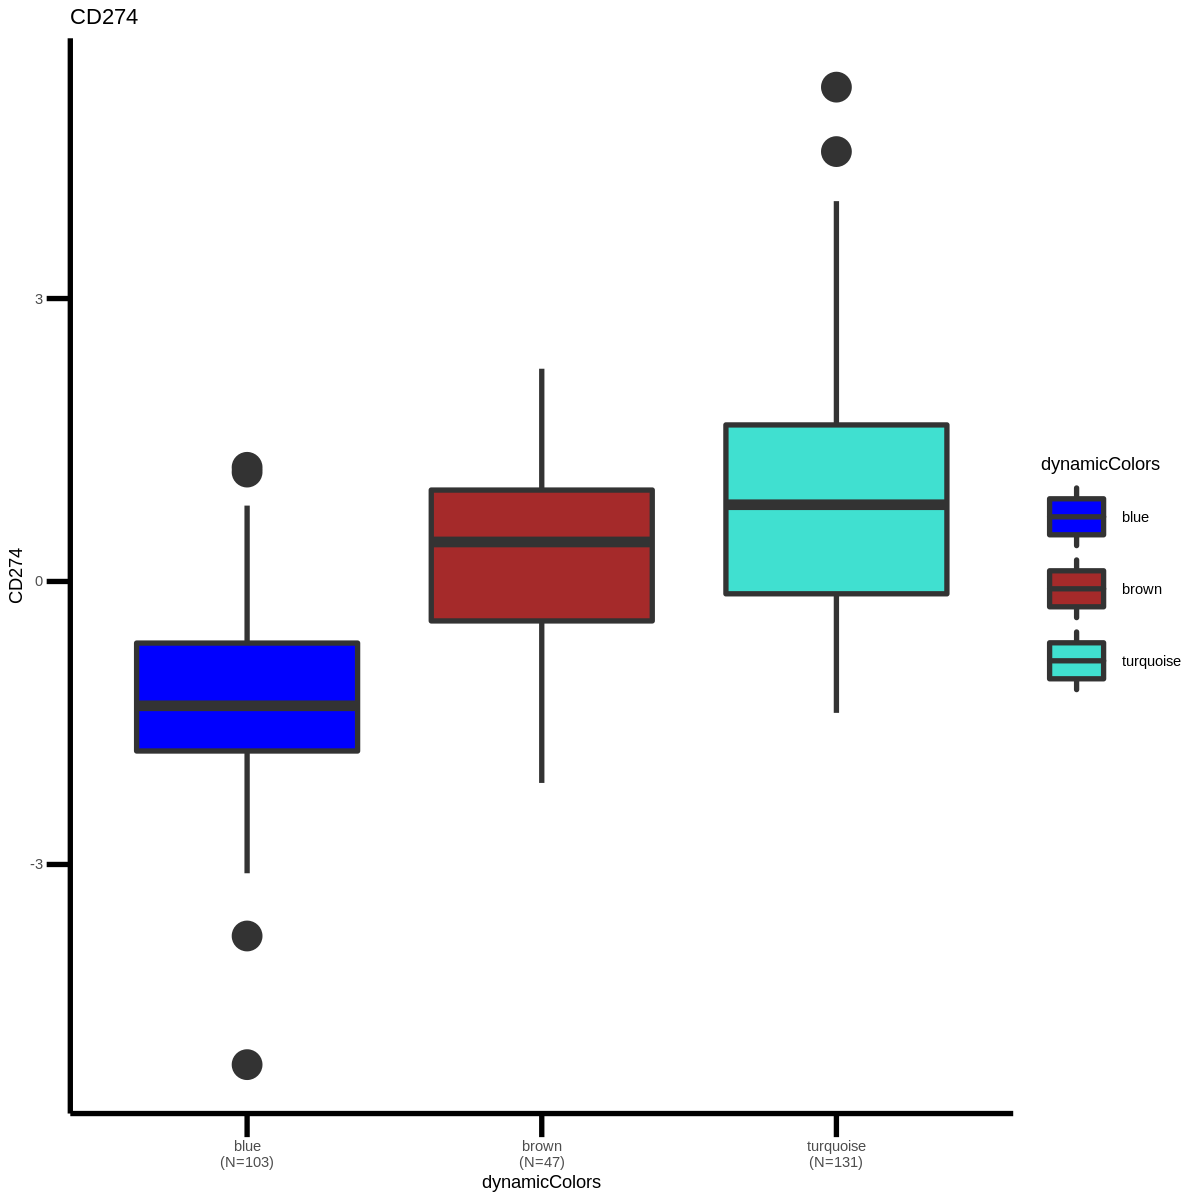

In [67]:
## 3)Gene plot

data=subset(MergeTable.Immune.Gene, !is.na(MergeTable.Immune.Gene$CD274))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Gene,aes(x = dynamicColors, y = CD274,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="CD274") 
ggpubr::compare_means(CD274 ~ dynamicColors,  data = MergeTable.Immune.Gene,
                     method = "wilcox.test")

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PDCD1LG2,blue,brown,5.714838e-16,1.1e-15,5.7e-16,****,Wilcoxon
PDCD1LG2,blue,turquoise,1.353531e-34,4.1e-34,< 2e-16,****,Wilcoxon
PDCD1LG2,brown,turquoise,1.518709e-05,1.5e-05,1.5e-05,****,Wilcoxon


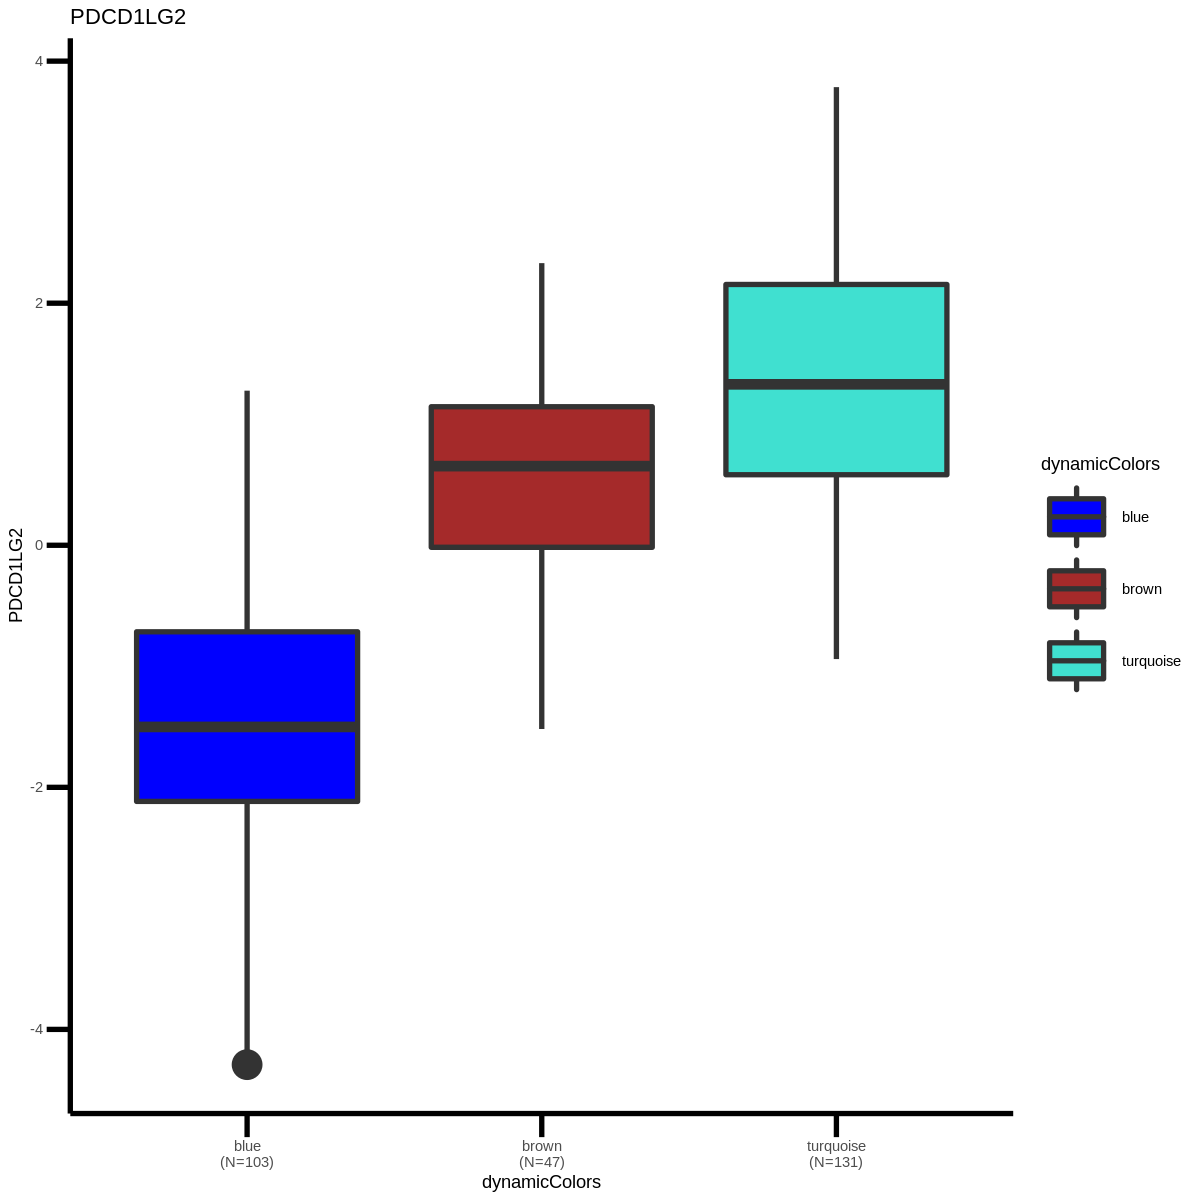

In [68]:

data=subset(MergeTable.Immune.Gene, !is.na(MergeTable.Immune.Gene$PDCD1LG2))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Gene,aes(x = dynamicColors, y = PDCD1LG2,fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +theme_classic() + 
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="PDCD1LG2") 
ggpubr::compare_means(PDCD1LG2 ~ dynamicColors,  data = MergeTable.Immune.Gene,
                     method = "wilcox.test")


     blue     brown turquoise    yellow 
      103        47       131         0 

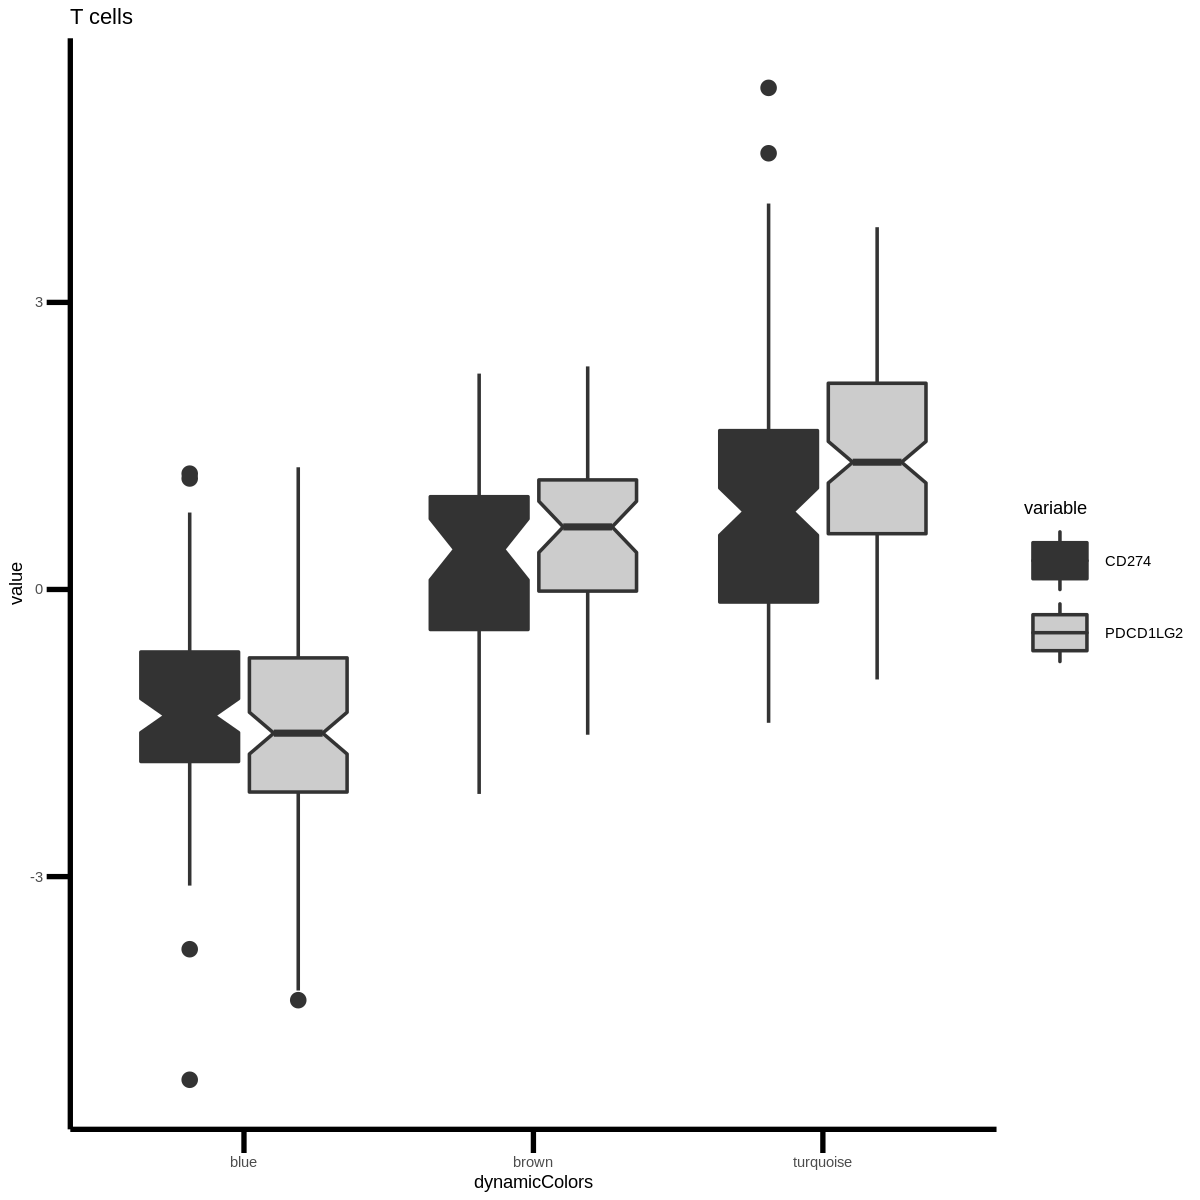

In [78]:
## New gene plot
MergeTable.Immune.Gene.clean <- MergeTable.Immune.Gene[,-c(1,3,4)]
MergeTable.Immune.Gene.clean <- MergeTable.Immune.Gene.clean[complete.cases(MergeTable.Immune.Gene.clean), ]
table(MergeTable.Immune.Gene.clean$dynamicColors)
library(reshape2)
MergeTable.Immune.Gene.clean.m <- melt(MergeTable.Immune.Gene.clean,id.vars='dynamicColors')
options(repr.plot.width=10, repr.plot.height=10)
ggplot(MergeTable.Immune.Gene.clean.m, aes(x=dynamicColors, y=value, fill=variable)) +
  geom_boxplot(lwd = 1,notch=T,outlier.size = 4) +
   scale_fill_grey()+
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
        axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  labs(title = "T cells")
